In [1]:
# Import a range of python libraries used in this notebook:
import datetime
import shutil
from pathlib import Path
from six.moves import urllib

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import cmweather

In [2]:
# Import tobac itself:
import tobac
print('using tobac version', str(tobac.__version__))

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


using tobac version 1.6.0


In [3]:
file = sorted(glob.glob("/data/project/ARM_Summer_School_2025/radar/dda/multidop/stonybrook/*")) #Star at the end pulls everything that's in that directory
file

['/data/project/ARM_Summer_School_2025/radar/dda/multidop/stonybrook/armrkhtxconv.20230401.071733.nc',
 '/data/project/ARM_Summer_School_2025/radar/dda/multidop/stonybrook/armrkhtxconv.20230401.072813.nc',
 '/data/project/ARM_Summer_School_2025/radar/dda/multidop/stonybrook/armrkhtxconv.20230401.074551.nc',
 '/data/project/ARM_Summer_School_2025/radar/dda/multidop/stonybrook/armrkhtxconv.20230401.080334.nc',
 '/data/project/ARM_Summer_School_2025/radar/dda/multidop/stonybrook/armrkhtxconv.20230401.082641.nc']

In [4]:
ds = xr.open_mfdataset(file) #files[0] just for the first file. Add "mf" before "dataset()" to open multiple files
ds

<xarray.Dataset> Size: 129MB
Dimensions:                     (time: 5, z: 31, y: 161, x: 161)
Coordinates:
  * time                        (time) datetime64[ns] 40B 2023-04-01T07:17:33...
  * x                           (x) float32 644B -4e+04 -3.95e+04 ... 4e+04
  * y                           (y) float32 644B -4e+04 -3.95e+04 ... 4e+04
  * z                           (z) float32 124B 0.0 500.0 ... 1.45e+04 1.5e+04
Data variables: (12/13)
    origin_latitude             (time) float32 20B dask.array<chunksize=(1,), meta=np.ndarray>
    origin_longitude            (time) float32 20B dask.array<chunksize=(1,), meta=np.ndarray>
    origin_altitude             (time) float32 20B dask.array<chunksize=(1,), meta=np.ndarray>
    projection                  (time) int32 20B 1 1 1 1 1
    ProjectionCoordinateSystem  (time) int32 20B 1 1 1 1 1
    eastward_wind_component     (time, z, y, x) float32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
    ...                          ...
    vertical_wind_component     (time, z, y, x) float32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
    hydrometeor_fall_speed      (time, z, y, x) float32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
    radar_coverage              (time, z, y, x) int32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
    northward_wind_component    (time, z, y, x) float32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
    radar_network_reflectivity  (time, z, y, x) float32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
    horizontal_wind_divergence  (time, z, y, x) float32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
Attributes: (12/17)
    comment:                        
    process_version:                
    input_datastreams_description:  A string consisting of the datastream(s),...
    input_datastreams:              
    description:                    
    state:                          
    ...                             ...
    project:                        
    facility_id:                    
    references:                     
    institution:                    
    input_datastreams_num:          
    history:                        created by user moue on cumulus.das.bnl.g...

In [5]:
ds["x"]

<xarray.DataArray 'x' (x: 161)> Size: 644B
array([-40000., -39500., -39000., -38500., -38000., -37500., -37000., -36500.,
       -36000., -35500., -35000., -34500., -34000., -33500., -33000., -32500.,
       -32000., -31500., -31000., -30500., -30000., -29500., -29000., -28500.,
       -28000., -27500., -27000., -26500., -26000., -25500., -25000., -24500.,
       -24000., -23500., -23000., -22500., -22000., -21500., -21000., -20500.,
       -20000., -19500., -19000., -18500., -18000., -17500., -17000., -16500.,
       -16000., -15500., -15000., -14500., -14000., -13500., -13000., -12500.,
       -12000., -11500., -11000., -10500., -10000.,  -9500.,  -9000.,  -8500.,
        -8000.,  -7500.,  -7000.,  -6500.,  -6000.,  -5500.,  -5000.,  -4500.,
        -4000.,  -3500.,  -3000.,  -2500.,  -2000.,  -1500.,  -1000.,   -500.,
            0.,    500.,   1000.,   1500.,   2000.,   2500.,   3000.,   3500.,
         4000.,   4500.,   5000.,   5500.,   6000.,   6500.,   7000.,   7500.,
         8000.,   8500.,   9000.,   9500.,  10000.,  10500.,  11000.,  11500.,
        12000.,  12500.,  13000.,  13500.,  14000.,  14500.,  15000.,  15500.,
        16000.,  16500.,  17000.,  17500.,  18000.,  18500.,  19000.,  19500.,
        20000.,  20500.,  21000.,  21500.,  22000.,  22500.,  23000.,  23500.,
        24000.,  24500.,  25000.,  25500.,  26000.,  26500.,  27000.,  27500.,
        28000.,  28500.,  29000.,  29500.,  30000.,  30500.,  31000.,  31500.,
        32000.,  32500.,  33000.,  33500.,  34000.,  34500.,  35000.,  35500.,
        36000.,  36500.,  37000.,  37500.,  38000.,  38500.,  39000.,  39500.,
        40000.], dtype=float32)
Coordinates:
  * x        (x) float32 644B -4e+04 -3.95e+04 -3.9e+04 ... 3.95e+04 4e+04
Attributes:
    long_name:      X distance on the projection plane from the origin
    units:          meters
    standard_name:  projection_x_coordinate
    axis:           X

In [6]:
#data_out=Path('../')

In [7]:
# Download the data: This only has to be done once for all tobac examples and can take a while
#data_file = list(data_out.rglob('data/Example_input_midlevelUpdraft.nc'))
#if len(data_file) == 0:
#    file_path='https://zenodo.org/records/3195910/files/climate-processes/tobac_example_data-v1.0.1.zip'
#    #file_path='http://zenodo..'
#    tempfile=Path('temp.zip')
#    print('start downloading data')
#    request=urllib.request.urlretrieve(file_path, tempfile)
#    print('start extracting data')
#    shutil.unpack_archive(tempfile, data_out)
#    tempfile.unlink()
#    print('data extracted')
#    data_file = list(data_out.rglob('data/Example_input_midlevelUpdraft.nc'))

In [8]:
#data_file_W_mid_max = list(data_out.rglob('data/Example_input_midlevelUpdraft.nc'))[0]
#data_file_TWC = list(data_out.rglob('data/Example_input_Condensate.nc'))[0]

In [9]:
#W_mid_max = xr.open_dataset(data_file_W_mid_max).w

In [10]:
#TWC = xr.open_dataset(data_file_TWC).twc

In [11]:
# Display information about the two dataarrays for vertical velocity and total condensate mixing ratio:
#display(W_mid_max)
#display(TWC)

In [12]:
#ds_1 = xr.open_mfdataset(data_file)

In [13]:
#ds_1

In [14]:
#plt.figure(figsize=(10,4))

#ax1 = plt.subplot(1,2,1)
#W_mid_max[42].plot(ax=ax1)

#ax2 = plt.subplot(1,2,2)
#W_mid_max.plot(ax=ax2, bins=100)
#plt.yscale("log")

#plt.subplots_adjust(wspace=0.35)

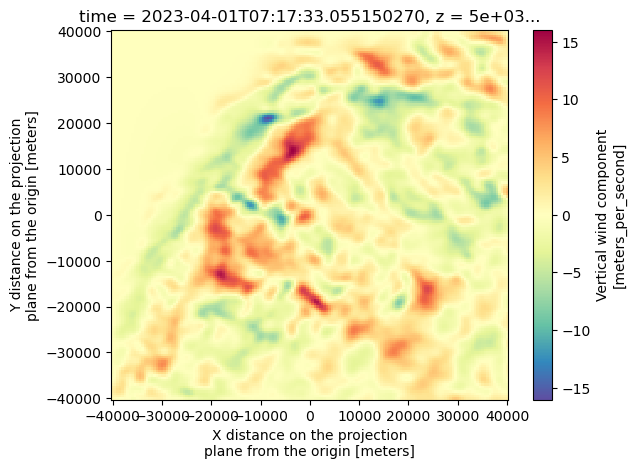

In [39]:
ds["vertical_wind_component"].isel(time=0).sel(z=5000).plot(cmap="Spectral_r")

In [16]:
vert_wind = ds["vertical_wind_component"]

In [17]:
vert_wind

<xarray.DataArray 'vertical_wind_component' (time: 5, z: 31, y: 161, x: 161)> Size: 16MB
dask.array<concatenate, shape=(5, 31, 161, 161), dtype=float32, chunksize=(1, 31, 161, 161), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 40B 2023-04-01T07:17:33.055150270 ... 2023...
  * x        (x) float32 644B -4e+04 -3.95e+04 -3.9e+04 ... 3.95e+04 4e+04
  * y        (y) float32 644B -4e+04 -3.95e+04 -3.9e+04 ... 3.95e+04 4e+04
  * z        (z) float32 124B 0.0 500.0 1e+03 ... 1.4e+04 1.45e+04 1.5e+04
Attributes:
    long_name:      Vertical wind component
    units:          meters_per_second
    standard_name:  vertical_wind_component

In [18]:
#vert_wind = vert_wind.drop_vars('z')

In [19]:
dxy = 500

In [20]:
dt = 15*60

In [21]:
# Keyword arguments for feature detection step:
parameters_features={}
parameters_features['position_threshold']='weighted_diff'
parameters_features['sigma_threshold']=0.5
parameters_features['min_distance']=0
parameters_features['sigma_threshold']=1
parameters_features['threshold']=[3] #m/s
parameters_features['n_erosion_threshold']=0
parameters_features['n_min_threshold']=3

In [22]:
# Perform feature detection and save results:
print('start feature detection based on midlevel column maximum vertical velocity')
Features=tobac.feature_detection_multithreshold(vert_wind,dxy, vertical_cord='z', **parameters_features)
print('feature detection performed start saving features')
#Features.to_hdf(savedir / 'Features.h5', 'table')
print('features saved')

start feature detection based on midlevel column maximum vertical velocity
feature detection performed start saving features
features saved


In [23]:
Features

,frame,idx,vdim,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,x,y,z
0,0,1,3.286941,6.746943,147.536310,202,3,1,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,33768.154788,-36626.528318,1643.470514
1,0,2,10.780778,83.487512,62.355190,21194,3,2,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,-8822.405179,1743.756049,5390.389103
2,0,3,4.151569,89.948144,148.325061,197,3,3,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,34162.530433,4974.071906,2075.784507
3,0,4,19.951694,36.157192,121.077667,31222,3,4,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,20538.833704,-21921.403753,9975.847177
4,0,5,3.178567,13.960780,118.510400,31,3,5,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,19255.200065,-33019.609933,1589.283528
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,4,34,25.953256,15.003983,140.633457,84,3,233,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,30316.728394,-32498.008467,12976.628089
233,4,35,27.897539,15.022256,85.905701,732,3,234,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,2952.850406,-32488.871815,13948.769574
234,4,36,27.080280,78.742907,113.762075,88,3,235,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,16881.037354,-628.546637,13540.140136
235,4,37,27.578417,116.942235,157.500967,114,3,236,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,38750.483256,18471.117536,13789.208313


In [26]:
# Keyword arguments for linking step:
parameters_linking={}
parameters_linking['method_linking']='predict'
parameters_linking['adaptive_stop']=0.5
parameters_linking['adaptive_step']=0.95
parameters_linking['extrapolate']=0
parameters_linking['order']=1
parameters_linking['subnetwork_size']=5
parameters_linking['memory']=0
parameters_linking['time_cell_min']=dt
parameters_linking['method_linking']='predict'
parameters_linking['v_max']=15

In [27]:
# Perform linking and save results:
Track=tobac.linking_trackpy(Features,vert_wind,dt=dt,dxy=dxy,**parameters_linking)
#Track.to_hdf(savedir / 'Track.h5', 'table')

Frame 4: 33 trajectories present.


In [28]:
Track

,frame,idx,vdim,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,x,y,z,cell,time_cell
0,0,1,3.286941,6.746943,147.536310,202,3,1,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,33768.154788,-36626.528318,1643.470514,1,0 days 00:00:00
1,0,2,10.780778,83.487512,62.355190,21194,3,2,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,-8822.405179,1743.756049,5390.389103,2,0 days 00:00:00
2,0,3,4.151569,89.948144,148.325061,197,3,3,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,34162.530433,4974.071906,2075.784507,3,0 days 00:00:00
3,0,4,19.951694,36.157192,121.077667,31222,3,4,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,20538.833704,-21921.403753,9975.847177,4,0 days 00:00:00
4,0,5,3.178567,13.960780,118.510400,31,3,5,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,19255.200065,-33019.609933,1589.283528,-1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,4,34,25.953256,15.003983,140.633457,84,3,233,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,30316.728394,-32498.008467,12976.628089,-1,NaT
233,4,35,27.897539,15.022256,85.905701,732,3,234,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,2952.850406,-32488.871815,13948.769574,65,0 days 00:58:28.002396345
234,4,36,27.080280,78.742907,113.762075,88,3,235,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,16881.037354,-628.546637,13540.140136,82,0 days 00:40:50.002231836
235,4,37,27.578417,116.942235,157.500967,114,3,236,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,38750.483256,18471.117536,13789.208313,-1,NaT


In [29]:
Track.groupby("cell")["time_cell"].max()

cell
-1                           NaT
 1     0 days 00:28:18.000530958
 2     0 days 00:10:40.000366449
 3     0 days 00:10:40.000366449
 4     0 days 00:28:18.000530958
                  ...           
 112   0 days 00:23:06.995227575
 114   0 days 00:23:06.995227575
 115   0 days 00:23:06.995227575
 116   0 days 00:23:06.995227575
 118   0 days 00:23:06.995227575
Name: time_cell, Length: 70, dtype: timedelta64[ns]

In [32]:
Track = Track[Track["cell"] != -1]

Text(0, 0.5, 'counts')

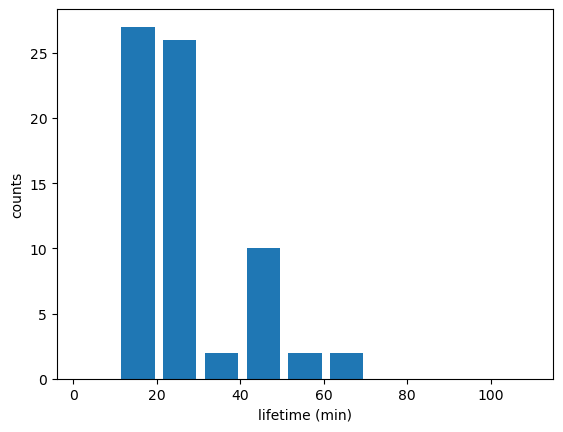

In [30]:
# Updraft lifetimes of tracked cells:
fig_lifetime,ax_lifetime=plt.subplots()
tobac.plot_lifetime_histogram_bar(Track,axes=ax_lifetime,bin_edges=np.arange(0,120,10),density=False,width_bar=8)
ax_lifetime.set_xlabel('lifetime (min)')
ax_lifetime.set_ylabel('counts')

In [36]:
#Segmentation
parameters_segmentation_TWC={}
parameters_segmentation_TWC['method']='watershed'
parameters_segmentation_TWC['threshold']=1 

In [38]:
print('Start segmentation based on total water content')
Mask_TWC, Features_TWC = tobac.segmentation_3D(Features, vert_wind, dxy, **parameters_segmentation_TWC)
print('segmentation TWC performed, start saving results to files')
#Mask_TWC.to_netcdf(savedir / 'Mask_Segmentation_TWC.nc', encoding={"segmentation_mask":{"zlib":True, "complevel":4}})
#Features_TWC.to_hdf(savedir / 'Features_TWC.h5','table')
print('segmentation TWC performed and saved')

Start segmentation based on total water content
segmentation TWC performed, start saving results to files
segmentation TWC performed and saved
